In [1]:
import numpy as np 
np.set_printoptions(threshold=10000,suppress=True) 
import pandas as pd
import warnings
import matplotlib.pyplot as plt 
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

In [2]:
na_values = ['na']
data_fbref = pd.read_csv('fbref/fbref_outfield_player_stats_combined_latest.csv', sep=',',na_values=na_values)
data_fbref = data_fbref.loc[data_fbref["League Name"]!='Champions-League']
data_fbref = data_fbref.loc[data_fbref["League Name"]!='Europa-League']
data_fbref

Player   Nation    Pos         Squad   Age    Born  MP  \
0            Aaron Hunt   de GER  MF,FW  Hamburger SV  30.0  1986.0  28   
1          Abdou Diallo   sn SEN     DF      Mainz 05  21.0  1996.0  27   
2       Ademola Lookman  eng ENG  MF,FW    RB Leipzig  19.0  1997.0  11   
3         Admir Mehmedi   ch SUI  DF,MF    Leverkusen  26.0  1991.0  12   
4         Admir Mehmedi   ch SUI  FW,MF     Wolfsburg  26.0  1991.0   5   
...                 ...      ...    ...           ...   ...     ...  ..   
22957     Álvaro Morata   es ESP     FW      Juventus  29.0  1992.0  24   
22958  Álvaro Odriozola   es ESP     DF    Fiorentina  26.0  1995.0  19   
22959           Éderson   br BRA     MF   Salernitana  22.0  1999.0   1   
22960  Łukasz Skorupski   pl POL     GK       Bologna  30.0  1991.0  24   
22961       Ștefan Radu   ro ROU     DF         Lazio  35.0  1986.0   6   

       Starts     Min   90s  Gls  Ast  G-PK  PK  PKatt  CrdY  CrdR  Gls/90  \
0          26  2081.0  23.1    3    2     2   1      1     1     0    0.13   
1          27  2415.0  26.8    2    1     2   0      0     5     0    0.07   
2           7   574.0   6.4    5    3     5   0      0     1     0    0.78   
3           8   700.0   7.8    2    3     2   0      0     3     0    0.26   
4           3   290.0   3.2    1    0     1   0      0     0     0    0.31   
...       ...     ...   ...  ...  ...   ...  ..    ...   ...   ...     ...   
22957      18  1596.0  17.7    5    1     5   0      0     4     0    0.28   
22958      14  1325.0  14.7    1    1     1   0      0     4     1    0.07   
22959       1    61.0   0.7    0    0     0   0      0     0     0    0.00   
22960      24  2160.0  24.0    0    0     0   0      0     3     0    0.00   
22961       3   326.0   3.6    0    0     0   0      0     1     0    0.00   

       Ast/90   G+A  G-PK/90  G+A-PK   xG  npxG   xA  npxG+xA  xG/90  xA/90  \
0        0.09  0.22     0.09    0.17  2.8   2.1  5.6      7.7   0.12   0.23   
1        0.04  0.11     0.07    0.11  2.3   2.3  0.8      3.2   0.09   0.03   
2        0.47  1.25     0.78    1.25  2.3   2.3  3.4      5.8   0.36   0.54   
3        0.39  0.64     0.26    0.64  1.1   1.1  1.3      2.4   0.14   0.17   
4        0.00  0.31     0.31    0.31  0.1   0.1  0.1      0.3   0.04   0.04   
...       ...   ...      ...     ...  ...   ...  ...      ...    ...    ...   
22957    0.06  0.34     0.28    0.34  4.6   4.6  4.0      8.6   0.26   0.22   
22958    0.07  0.14     0.07    0.14  0.5   0.5  2.5      2.9   0.03   0.17   
22959    0.00  0.00     0.00    0.00  0.0   0.0  0.0      0.0   0.00   0.00   
22960    0.00  0.00     0.00    0.00  0.0   0.0  0.0      0.0   0.00   0.00   
22961    0.00  0.00     0.00    0.00  0.1   0.1  0.0      0.1   0.02   0.00   

       xG+xA  npxG/90  npxG+xA/90    Sh  SoT  SoT%  Sh/90  SoT/90  G/Sh  \
0       0.35     0.09        0.32  27.0    6  22.2   1.17    0.26  0.07   
1       0.12     0.09        0.12  13.0    3  23.1   0.48    0.11  0.15   
2       0.90     0.36        0.90  13.0    6  46.2   2.04    0.94  0.38   
3       0.31     0.14        0.31  13.0    4  30.8   1.67    0.51  0.15   
4       0.08     0.04        0.08   4.0    1  25.0   1.24    0.31  0.25   
...      ...      ...         ...   ...  ...   ...    ...     ...   ...   
22957   0.49     0.26        0.49  39.0   17  43.6   2.20    0.96  0.13   
22958   0.20     0.03        0.20   3.0    1  33.3   0.20    0.07  0.33   
22959   0.00     0.00        0.00   0.0    0   NaN   0.00    0.00   NaN   
22960   0.00     0.00        0.00   0.0    0   NaN   0.00    0.00   NaN   
22961   0.02     0.02        0.02   2.0    1  50.0   0.55    0.28  0.00   

       G/SoT  Dist    FK  npxG/Sh  G-xG  np:G-xG    Cmp     Att  Cmp%  \
0       0.33  23.4  10.0     0.08   0.2     -0.1  883.0  1229.0  71.8   
1       0.67   6.6   0.0     0.18  -0.3     -0.3  905.0  1201.0  75.4   
2       0.83  12.9   1.0     0.18   2.7      2.7  176.0   236.0  74.6   
3       0.50  16.9   1.0     0.09   0

In [3]:
mycolumns = ['Player','90s','Gls/90','Ast/90','xG/90','xA/90','Sh/90','SoT/90','FK','Cmp','Att',\
             'TotDist','PrgDist','KP','1/3','PPA',\
             'CrsPA','Prog','SCA90','PassLive','PassDead','Drib','Fld','Def','GCA90','PassLive_AMB','PassDead_AMB','Drib_AMB',\
            'Fld_AMB','Def_AMB','Tkl','TklW','Def 3rd','Mid 3rd','Att 3rd','Tkl_dribble','Past','Succ','Def 3rd_pression', \
             'Mid 3rd_pression','Att 3rd_pression','Touches','Def Pen','Att Pen','Carries','CPA','Fls']

In [4]:
data_fbref_ok=data_fbref[mycolumns]
data_fbref_ok

Player   90s  Gls/90  Ast/90  xG/90  xA/90  Sh/90  SoT/90  \
0            Aaron Hunt  23.1    0.13    0.09   0.12   0.23   1.17    0.26   
1          Abdou Diallo  26.8    0.07    0.04   0.09   0.03   0.48    0.11   
2       Ademola Lookman   6.4    0.78    0.47   0.36   0.54   2.04    0.94   
3         Admir Mehmedi   7.8    0.26    0.39   0.14   0.17   1.67    0.51   
4         Admir Mehmedi   3.2    0.31    0.00   0.04   0.04   1.24    0.31   
...                 ...   ...     ...     ...    ...    ...    ...     ...   
22957     Álvaro Morata  17.7    0.28    0.06   0.26   0.22   2.20    0.96   
22958  Álvaro Odriozola  14.7    0.07    0.07   0.03   0.17   0.20    0.07   
22959           Éderson   0.7    0.00    0.00   0.00   0.00   0.00    0.00   
22960  Łukasz Skorupski  24.0    0.00    0.00   0.00   0.00   0.00    0.00   
22961       Ștefan Radu   3.6    0.00    0.00   0.02   0.00   0.55    0.28   

         FK    Cmp     Att  TotDist  PrgDist    KP   1/3   PPA  CrsPA   Prog  \
0      10.0  883.0  1229.0  16889.0   5315.0  65.0  83.0  31.0    5.0   97.0   
1       0.0  905.0  1201.0  19676.0   8949.0   6.0  80.0  20.0    7.0  109.0   
2       1.0  176.0   236.0   2641.0    819.0  17.0  13.0   7.0    0.0   24.0   
3       1.0  321.0   419.0   5187.0   2104.0  21.0  21.0  16.0    7.0   34.0   
4       0.0   98.0   131.0   1594.0    423.0   4.0   5.0   3.0    2.0   11.0   
...     ...    ...     ...      ...      ...   ...   ...   ...    ...    ...   
22957   0.0  333.0   449.0   5551.0    927.0  33.0  21.0  11.0    3.0   28.0   
22958   0.0  699.0   797.0  12509.0   3880.0  21.0  24.0  12.0    5.0   34.0   
22959   0.0    7.0    10.0    147.0     17.0   0.0   0.0   0.0    0.0    0.0   
22960   0.0  604.0   808.0  17722.0  10473.0   0.0   2.0   0.0    0.0    0.0   
22961   0.0  149.0   180.0   2887.0   1024.0   0.0  14.0   0.0    0.0   13.0   

       SCA90  PassLive  PassDead  Drib  Fld  Def  GCA90  PassLive_AMB  \
0       4.25      54.0      43.0   1.0  2.0  1.0   0.25           5.0   
1       0.97      21.0       0.0   3.0  0.0  1.0   0.15           4.0   
2       5.02      20.0       2.0   6.0  3.0  0.0   0.94           3.0   
3       3.99      23.0       3.0   1.0  4.0  0.0   0.51           3.0   
4       1.56       3.0       2.0   0.0  0.0  0.0   0.00           0.0   
...      ...       ...       ...   ...  ...  ...    ...           ...   
22957   3.21      44.0       0.0   2.0  8.0  1.0   0.45           5.0   
22958   2.58      33.0       2.0   2.0  1.0  0.0   0.20           3.0   
22959   1.48       0.0       0.0   0.0  1.0  0.0   0.00           0.0   
22960   0.00       0.0       0.0   0.0  0.0  0.0   0.00           0.0   
22961   0.00       0.0       0.0   0.0  0.0  0.0   0.00           0.0   

       PassDead_AMB  Drib_AMB  Fld_AMB  Def_AMB   Tkl  TklW  Def 3rd  Mid 3rd  \
0               1.0       0.0      0.0      0.0  30.0  22.0     12.0     16.0   
1               0.0       0.0      0.0      0.0  63.0  42.0     38.0     22.0   
2               0.0       2.0      0.0      0.0   4.0   3.0      3.0      1.0   
3               0.0       0.0      1.0      0.0  14.0   9.0      6.0      5.0   
4               0.0       0.0      0.0      0.0   3.0   1.0      2.0      0.0   
...             ...       ...      ...      ...   ...   ...      ...      ...   
22957           0.0       1.0      1.0      0.0   9.0   7.0      2.0      4.0   
22958           0.0       0.0      0.0      0.0  21.0  12.0     10.0      7.0   
22959           0.0       0.0      0.0      0.0   3.0   1.0      3.0      0.0   
22960           0.0       0.0      0.0      0.0   0.0   0.0      0.0      0.0   
22961           0.0       0.0      0.0      0.0   2.0   1.0      1.0      1.0   

       Att 3rd  Tkl_dribble  Past   Succ  Def 3rd_pression  Mid 3rd_pression  \
0          2.0          5.0  32.0  135.0             102.0             261.0   
1          3.0         19.0  12.0  144.0             219.0             109.0   
2          0.0          1.0  

In [5]:
liste_90 = ['FK','Cmp','Att',\
             'TotDist','PrgDist','KP','1/3','PPA',\
             'CrsPA','Prog','PassLive','PassDead','Drib','Fld','Def','PassLive_AMB','PassDead_AMB','Drib_AMB',\
            'Fld_AMB','Def_AMB','Tkl','TklW','Def 3rd','Mid 3rd','Att 3rd','Tkl_dribble','Past','Succ','Def 3rd_pression', \
             'Mid 3rd_pression','Att 3rd_pression','Touches','Def Pen','Att Pen','Carries','CPA','Fls']

In [6]:
data_fbref_ok_flt = data_fbref_ok.loc[data_fbref_ok['90s'] > 6]  

In [7]:
for i in liste_90:
    data_fbref_ok_flt[str(i)]=data_fbref_ok_flt[str(i)]/data_fbref_ok_flt['90s']
del data_fbref_ok_flt['90s']
data_fbref_ok_flt

Player  Gls/90  Ast/90  xG/90  xA/90  Sh/90  SoT/90  \
0              Aaron Hunt    0.13    0.09   0.12   0.23   1.17    0.26   
1            Abdou Diallo    0.07    0.04   0.09   0.03   0.48    0.11   
2         Ademola Lookman    0.78    0.47   0.36   0.54   2.04    0.94   
3           Admir Mehmedi    0.26    0.39   0.14   0.17   1.67    0.51   
6             Albin Ekdal    0.00    0.08   0.04   0.08   0.65    0.08   
...                   ...     ...     ...    ...    ...    ...     ...   
22955    Zinho Vanheusden    0.00    0.00   0.01   0.01   0.55    0.18   
22956  Zlatan Ibrahimović    0.79    0.10   0.65   0.16   4.46    1.59   
22957       Álvaro Morata    0.28    0.06   0.26   0.22   2.20    0.96   
22958    Álvaro Odriozola    0.07    0.07   0.03   0.17   0.20    0.07   
22960    Łukasz Skorupski    0.00    0.00   0.00   0.00   0.00    0.00   

             FK        Cmp        Att     TotDist     PrgDist        KP  \
0      0.432900  38.225108  53.203463  731.125541  230.086580  2.813853   
1      0.000000  33.768657  44.813433  734.179104  333.917910  0.223881   
2      0.156250  27.500000  36.875000  412.656250  127.968750  2.656250   
3      0.128205  41.153846  53.717949  665.000000  269.743590  2.692308   
6      0.000000  34.959350  45.528455  647.642276  192.357724  0.487805   
...         ...        ...        ...         ...         ...       ...   
22955  0.000000  30.181818  37.636364  625.636364  187.909091  0.090909   
22956  0.495050  28.118812  38.415842  421.683168  110.000000  2.178218   
22957  0.000000  18.813559  25.367232  313.615819   52.372881  1.864407   
22958  0.000000  47.551020  54.217687  850.952381  263.945578  1.428571   
22960  0.000000  25.166667  33.666667  738.416667  436.375000  0.000000   

            1/3       PPA     CrsPA      Prog  SCA90  PassLive  PassDead  \
0      3.593074  1.341991  0.216450  4.199134   4.25  2.337662  1.861472   
1      2.985075  0.746269  0.261194  4.067164   0.97  0.783582  0.000000   
2      2.031250  1.093750  0.000000  3.750000   5.02  3.125000  0.312500   
3      2.692308  2.051282  0.897436  4.358974   3.99  2.948718  0.384615   
6      4.390244  0.487805  0.000000  4.390244   1.71  1.382114  0.000000   
...         ...       ...       ...       ...    ...       ...       ...   
22955  1.909091  0.000000  0.000000  1.818182   0.36  0.363636  0.000000   
22956  2.871287  1.881188  0.198020  3.861386   4.06  3.366337  0.000000   
22957  1.186441  0.621469  0.169492  1.581921   3.21  2.485876  0.000000   
22958  1.632653  0.816327  0.340136  2.312925   2.58  2.244898  0.136054   
22960  0.083333  0.000000  0.000000  0.000000   0.00  0.000000  0.000000   

           Drib       Fld       Def  GCA90  PassLive_AMB  PassDead_AMB  \
0      0.043290  0.086580  0.043290   0.25      0.216450       0.04329   
1      0.111940  0.000000  0.037313   0.15      0.149254       0.00000   
2      0.937500  0.468750  0.000000   0.94      0.468750       0.00000   
3      0.128205  0.512821  0.000000   0.51      0.384615       0.00000   
6      0.000000  0.162602  0.162602   0.16      0.081301       0.00000   
...         ...       ...       ...    ...           ...           ...   
22955  0.000000  0.000000  0.000000   0.09      0.090909       0.00000   
22956  0.099010  0.099010  0.198020   0.40      0.198020       0.00000   
22957  0.112994  0.451977  0.056497   0.45      0.282486       0.00000   
22958  0.136054  0.068027  0.000000   0.20      0.204082       0.00000   
22960  0.000000  0.000000  0.000000   0.00      0.000000       0.00000   

       Drib_AMB   Fld_AMB   Def_AMB       Tkl      TklW   Def 3rd   Mid 3rd  \
0      0.000000  0.000000  0.000000  1.298701  0.952381  0.519481  0.692641   
1      0.000000  0.000000  0.000000  2.350746  1.567164  1.417910  0.820896   
2      0.312500  0.000000  0.000000  0.625000  0.468750  0.468750  0.156250   
3      0.000000  0.128205  0.000000  1.794872  1.153846  0.769231  0.641026   
6      0.000000  0.000000  0.081

In [8]:
X = data_fbref_ok_flt.iloc[:, 1:].values
labels = data_fbref_ok_flt.iloc[:, 0].values
display(X)

array([[ 0.13      ,  0.09      ,  0.12      , ..., 38.61471861,
         0.3030303 ,  1.2987013 ],
       [ 0.07      ,  0.04      ,  0.09      , ..., 32.31343284,
         0.03731343,  2.12686567],
       [ 0.78      ,  0.47      ,  0.36      , ..., 42.1875    ,
         1.09375   ,  2.03125   ],
       ...,
       [ 0.28      ,  0.06      ,  0.26      , ..., 27.57062147,
         1.24293785,  2.09039548],
       [ 0.07      ,  0.07      ,  0.03      , ..., 42.31292517,
         1.15646259,  1.08843537],
       [ 0.        ,  0.        ,  0.        , ..., 16.83333333,
         0.        ,  0.04166667]])

In [9]:
from sklearn.preprocessing import StandardScaler
SS = StandardScaler()
SS.fit(X)
Xnorm=SS.transform(X)
Xnorm

array([[ 0.03193689,  0.04804885, -0.04337223, ...,  0.24058531,
        -0.12048967, -0.04510886],
       [-0.31970724, -0.43703637, -0.24550446, ..., -0.25144751,
        -0.67722166,  1.12461488],
       [ 3.84141493,  3.73469656,  1.57368555, ...,  0.5195642 ,
         1.53623219,  0.98956449],
       ...,
       [ 0.91104721, -0.24300228,  0.89991148, ..., -0.62178763,
         1.8488117 ,  1.07310331],
       [-0.31970724, -0.14598524, -0.6497689 , ...,  0.52935797,
         1.66762807, -0.34209464],
       [-0.72995872, -0.82510455, -0.85190113, ..., -1.46020353,
        -0.75540105, -1.82058158]])

In [15]:
from sklearn import decomposition
from sklearn import datasets
from sklearn.decomposition import PCA
pca = PCA(n_components=45)
pca.fit(Xnorm)

PCA(n_components=45)

In [16]:
pca.explained_variance_ratio_

array([0.30638551, 0.22525169, 0.10765235, 0.04748215, 0.0350778 ,
       0.02859231, 0.02587141, 0.02243374, 0.0215529 , 0.01868528,
       0.01615997, 0.01373189, 0.01255195, 0.01199403, 0.01090524,
       0.00965916, 0.00875101, 0.00783762, 0.00761174, 0.00736272,
       0.00621898, 0.00562992, 0.00527437, 0.00459636, 0.00456707,
       0.00406469, 0.00341621, 0.00308294, 0.00262709, 0.00237275,
       0.00201468, 0.00162821, 0.00155201, 0.0012095 , 0.00117679,
       0.00111498, 0.0009769 , 0.00076084, 0.00071432, 0.00062568,
       0.00043336, 0.00026848, 0.00007806, 0.00004533, 0.        ])

In [17]:
pca = PCA(n_components=2)
pca.fit(Xnorm)
X_pca = pca.transform(Xnorm)
X_pca

array([[ 3.54594868,  1.93947337],
       [-2.27050377,  1.60327446],
       [10.08897617, -2.61426414],
       ...,
       [ 5.07125017, -3.94000188],
       [ 0.38931286,  0.71584221],
       [-6.0642641 , -5.42207478]])

In [19]:
1/np.sqrt(44)

0.15075567228888181

In [20]:
pca.components_

array([[ 0.18062391,  0.18788776,  0.19644407,  0.22490171,  0.22725794,
         0.21688742,  0.10560619, -0.05491152, -0.0483774 , -0.11957139,
        -0.1714176 ,  0.22361066,  0.0052006 ,  0.19126664,  0.09752366,
         0.07544015,  0.24552529,  0.23076346,  0.10190291,  0.18867856,
         0.17531461,  0.0918047 ,  0.22225115,  0.19368156,  0.08134845,
         0.13177696,  0.1107318 ,  0.05418363,  0.00300903,  0.01511358,
        -0.07033148,  0.0416589 ,  0.14080716, -0.02462558,  0.08324118,
         0.13570535, -0.03518232,  0.15286616,  0.21859844, -0.01666606,
        -0.17853267,  0.2232463 ,  0.04843163,  0.19906934,  0.09159191],
       [-0.11532051,  0.03217292, -0.13219746,  0.0351348 , -0.08240305,
        -0.10561729,  0.02215155,  0.24601394,  0.25488902,  0.19924012,
         0.09449349,  0.06911999,  0.25002291,  0.10184708,  0.0784695 ,
         0.25317847,  0.06142799,  0.08186573,  0.07750157, -0.04292522,
        -0.04916807,  0.05245817,  0.01729211,  0.

Text(0.5, 1.0, 'Circle of Correlations')

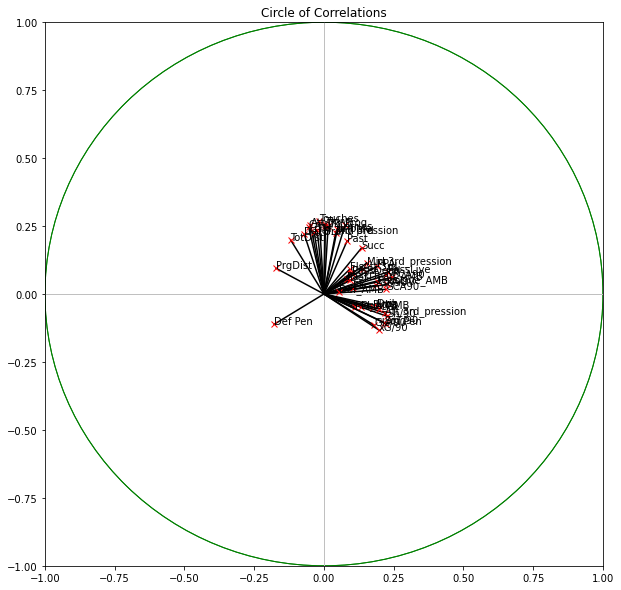

In [21]:
coef = np.transpose(pca.components_)
cols = ['y'+str(x+1) for x in range(2)]

pc_infos = pd.DataFrame(coef,columns=cols ,index=data_fbref_ok_flt.iloc[:,1:].columns)

plt.Circle((0,0),radius=10, color='g', fill=False)
circle1=plt.Circle((0,0),radius=1, color='g', fill=False)
# Ajouter les axes et donner la limite pour chaque axe
fig, axes= plt.subplots(figsize=(10,10))
axes.set_xlim(-1,1)
axes.set_ylim(-1,1)
fig.gca().add_artist(circle1)
plt.plot([-1,1],[0,0],color='silver',linestyle='-',linewidth=1)
plt.plot([0,0],[-1,1],color='silver',linestyle='-',linewidth=1)
axes.add_artist(circle1)
# Affichage de chaque variable explicative dans la cercle
for idx in range(len(pc_infos["y1"])):
    x = pc_infos["y1"][idx]
    y = pc_infos["y2"][idx]
    plt.plot([0.0,x],[0.0,y],'k-')
    plt.plot(x, y, 'rx')
    plt.annotate(pc_infos.index[idx], xy=(x,y))
plt.xlim((-1,1))
plt.ylim((-1,1))
plt.title("Circle of Correlations")


In [22]:
import matplotlib.colors as colors
from matplotlib.cm import bwr as cmap
import matplotlib.patches as mpatches

def print_top_comp(components, feature_names, n_top_comp):
    taille=feature_names.shape[0]
    seuil=1/np.sqrt(taille)
    for comp_idx, topic in enumerate(components):
        Y=np.abs(topic)
        feature_pos=feature_names[topic>seuil]
        feature_neg=feature_names[topic<=-seuil]
        n_top_comp_pos=min(n_top_comp,feature_pos.shape[0])
        n_top_comp_neg=min(n_top_comp,feature_neg.shape[0])


        feature_pos=feature_names[topic.argsort()[::-1][:n_top_comp_pos]]
        feature_neg=feature_names[topic.argsort()[:n_top_comp_neg]]
        fea=np.concatenate((feature_pos,feature_neg))
        com_pos=np.sort(topic)[::-1][:n_top_comp_pos]
        com_neg=np.sort(topic)[:n_top_comp_neg]
        com=np.concatenate((com_pos,com_neg))

                
        c_normal = colors.PowerNorm(1,vmin=min(com),vmax=max(com))
        _COLORS = cmap(c_normal(com))

      
        components = pd.DataFrame(np.array(com),index =fea) 
        fig, ax = plt.subplots(figsize = (5,3))
        # Plot the feature weights as a function of the components
        components.plot(ax = ax, kind = 'bar',align = "center", color=_COLORS)
        #plt.xlabel("Dimension #%d " % comp_idx)
        ax.set_ylabel("Feature Weights") 
        red_patch = mpatches.Patch(color='red', label="Variable-%d " % (comp_idx+1))
        ax.legend(handles=[red_patch])
        plt.show()

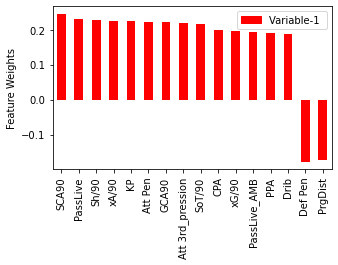

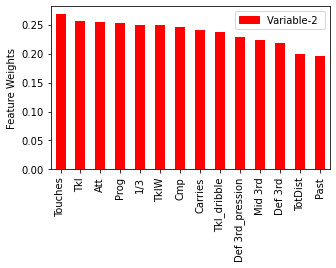

In [23]:
print_top_comp(pca.components_,data_fbref_ok_flt.columns[1:],14)

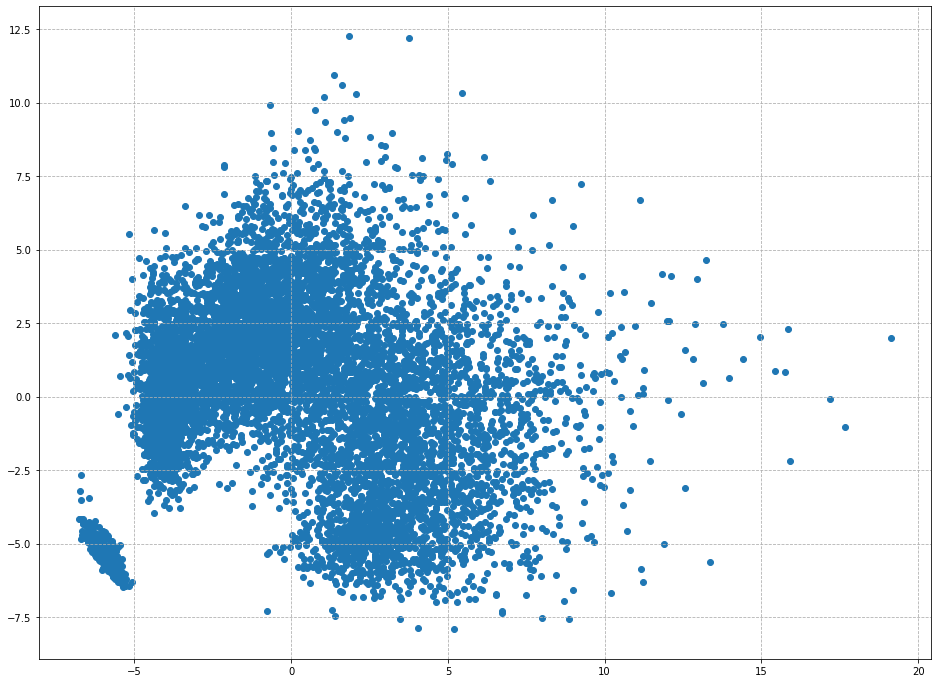

In [24]:
import matplotlib
plt.figure(figsize=(16,12))
plt.grid(True,which="both", linestyle='--')
plt.scatter(X_pca[:, 0], X_pca[:, 1])
#for label, x, y in zip(labels, X_pca[:, 0], X_pca[:, 1]):
    #plt.annotate(label, xy=(x, y), xytext=(-0.2, 0.2), textcoords='offset points')

plt.show()

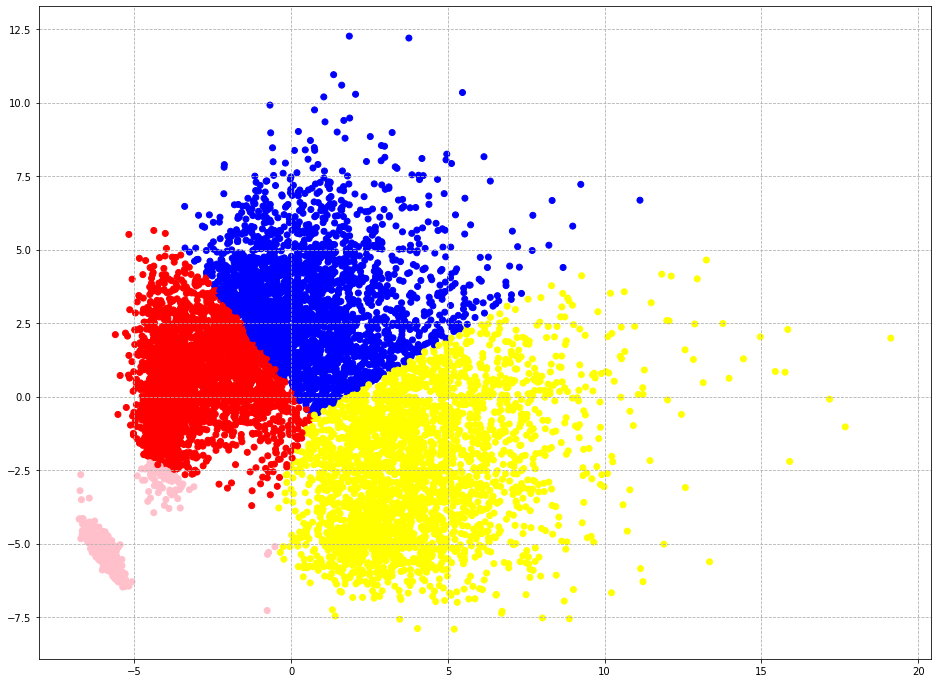

In [25]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4, random_state=0).fit(X_pca)
clustering=kmeans.labels_
colors = ['red','yellow','blue','pink']
plt.figure(figsize=(16,12))
plt.grid(True,which="both", linestyle='--')
plt.scatter(X_pca[:, 0], X_pca[:, 1], c= clustering, cmap=matplotlib.colors.ListedColormap(colors))
#for label, x, y in zip(labels, X_pca[:, 0], X_pca[:, 1]):
    #plt.annotate(label, xy=(x, y), xytext=(-0.2, 0.2), textcoords='offset points')
plt.show()